In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

import numpy as np
import mglearn
import mglearn.datasets

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes["data"], diabetes["target"], random_state=42)

In [3]:
print(f"Ключи diabetes: \n{diabetes.keys()}")

Ключи diabetes: 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [4]:
print(f"Форма массива data: \n {diabetes['data'].shape}")

Форма массива data: 
 (442, 10)


In [5]:
hist, bin_edges = np.histogram(diabetes.target, bins=10)

# Создаем словарь с подсчетами для каждого бина
class_counts = {f"Bin {i+1}": count for i, count in enumerate(hist)}

print("Количество примеров для каждого класса:\n{}".format(class_counts))

Количество примеров для каждого класса:
{'Bin 1': 38, 'Bin 2': 80, 'Bin 3': 68, 'Bin 4': 62, 'Bin 5': 50, 'Bin 6': 41, 'Bin 7': 38, 'Bin 8': 42, 'Bin 9': 17, 'Bin 10': 6}


In [6]:
print(f"Имена признаков: \n {diabetes.feature_names}")

Имена признаков: 
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [7]:
diabetes.data.shape

(442, 10)

In [8]:
diabetes.target.shape

(442,)

KNeighborsRegressor

In [9]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [10]:
X_test

array([[ 0.04534098, -0.04464164, -0.00620595, ...,  0.03430886,
         0.03243232, -0.0052198 ],
       [ 0.09256398, -0.04464164,  0.03690653, ..., -0.03949338,
        -0.02251653, -0.02178823],
       [ 0.06350368,  0.05068012, -0.00405033, ..., -0.00259226,
         0.08449153, -0.01764613],
       ...,
       [ 0.02354575, -0.04464164,  0.01966154, ..., -0.00259226,
         0.06605067,  0.04862759],
       [ 0.01628068, -0.04464164,  0.02612841, ..., -0.03395821,
        -0.05140387, -0.02593034],
       [ 0.06713621,  0.05068012, -0.03638469, ...,  0.03430886,
         0.00114758,  0.03205916]])

In [11]:
print("Прогнозы для тестового набора: \n {}".format(reg.predict(X_test)))

Прогнозы для тестового набора: 
 [130.66666667 194.66666667 145.         239.         168.66666667
 131.33333333 239.66666667 177.66666667  98.          80.66666667
  72.         151.66666667 120.66666667 196.66666667  67.
 133.33333333 274.         262.33333333 207.33333333 256.66666667
 150.66666667  72.66666667  94.33333333 182.66666667 132.66666667
 145.66666667 176.66666667 158.33333333  76.         108.33333333
 171.33333333 142.33333333  83.33333333 196.66666667 143.
 246.          73.66666667 168.66666667 170.66666667  96.33333333
  84.33333333 113.66666667 133.         165.66666667 211.
  77.          61.          71.         101.66666667 133.33333333
 157.66666667 106.         145.         125.33333333 176.66666667
 143.33333333  68.33333333 164.33333333 151.33333333  74.
 145.66666667 108.          64.66666667  75.         142.33333333
 148.66666667 211.33333333 167.         159.         108.66666667
 108.66666667 197.66666667 188.          75.         123.66666667
 208.6666

In [12]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.37


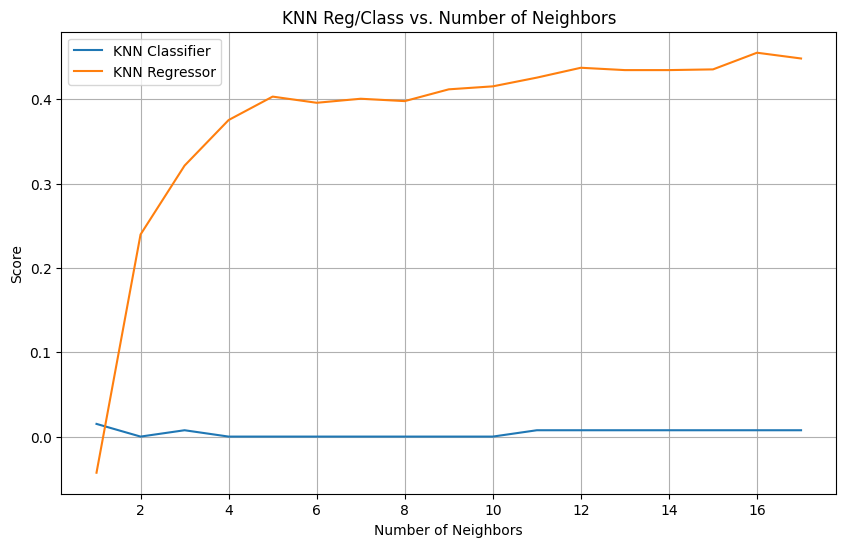

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import load_diabetes


diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_neighbors_values = range(1, 18)

knn_classifier = []
knn_regressor = []
for n_neighbors in n_neighbors_values:
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    knn_regressor.append(reg.score(X_test, y_test))
    

    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
        
    knn_classifier.append(np.mean(y_pred == y_test))

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, knn_classifier, label="KNN Classifier")
plt.plot(n_neighbors_values, knn_regressor, label="KNN Regressor")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.legend()
plt.title("KNN Reg/Class vs. Number of Neighbors")
plt.grid(True)
plt.show()


На этом графике можно увидеть сравнение классификации методом к-средних и регрессией ближайших соседей. 
Регрессия ближайших соседей показывает себя не очень хорошо всего 40% точности, 
но в то же время это намного лучше чем классификация метедом к-средних которая никак не обучается

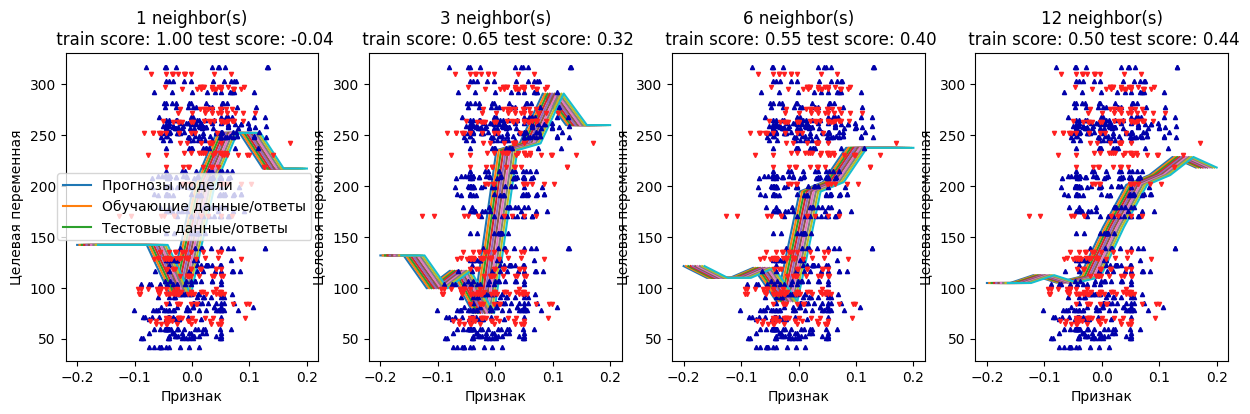

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -.2 и .2 
line = np.linspace(-.2, .2, 100).reshape(-1, 10)
for n_neighbors, ax in zip([1, 3, 6, 12], axes):
 # получаем прогнозы, используя 1, 3, 9, 12 соседей
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train[:50], y_train[:50], '^', c=mglearn.cm2(0), markersize=3)
 ax.plot(X_test[:27], y_test[:27], 'v', c=mglearn.cm2(1), markersize=3)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
 "Тестовые данные/ответы"], loc="best")

Используя метод Регрессии ближайших соседей у меня получилось добиться только 46% процентов точности на тестовом наборе. Этот результат был достигнут при использовании модели с проверкой 6 соседей. 6 и более соседей в среднем всегда дают примерно 40-45% точности на тестовом наборе, а также 50% точности на обученном наборе. 

LinearRegression

In [15]:
lr = LinearRegression().fit(X_train, y_train)

In [16]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]
lr.intercept_: 151.00821291456543


In [17]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.48


Ridge

In [18]:
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.43
Правильность на тестовом наборе: 0.42


In [19]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.15
Правильность на тестовом наборе: 0.15


In [20]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.48


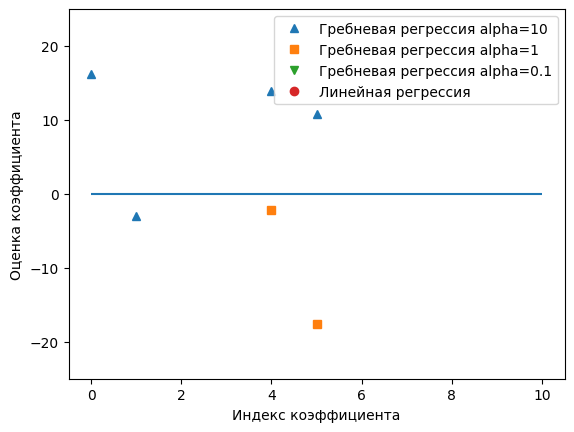

In [21]:
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Lasso

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество используемых признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.36
Правильность на тестовом наборе: 0.36
Количество используемых признаков: 3.00


In [23]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество используемых признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.48
Количество используемых признаков: 3.00


In [24]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество используемых признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.52
Правильность на тестовом наборе: 0.48
Количество используемых признаков: 3.00


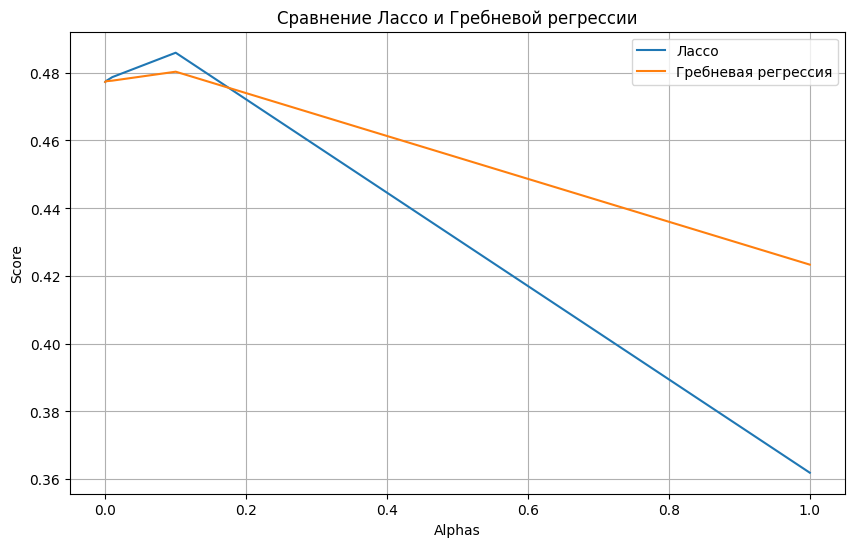

In [25]:
alphas = []
multplr = 1;
for i in range(0, 6):
    alphas.append(multplr * 0.00001)
    multplr *= 10
        
lasso_list = []
ridge_list = []
for alpha in alphas:
    
    ridgel = Ridge(alpha=alpha).fit(X_train, y_train)
    ridgel.fit(X_train, y_train)
    ridge_list.append(ridgel.score(X_test, y_test))
    

    lassol = Lasso(alpha=alpha).fit(X_train, y_train)
    lassol.fit(X_train, y_train)
    lasso_list.append(lassol.score(X_test, y_test))
        

plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_list, label="Лассо")
plt.plot(alphas, ridge_list, label="Гребневая регрессия")
plt.xlabel("Alphas")
plt.ylabel("Score")
plt.legend()
plt.title("Сравнение Лассо и Гребневой регрессии")
plt.grid(True)
plt.show()

На этом графике можно увидеть сравнение 2 разных алгоритмов, Лассо и Гребневой. Очень интересно то что Лассо может дать Результат чуть выше чем Гребневая регрессия но в то же время в среднем Гребневая показывает себя лучше. Так же интересно, что оба алгоритма поднимаются и опускаются на одних и тех же значениях альфы.

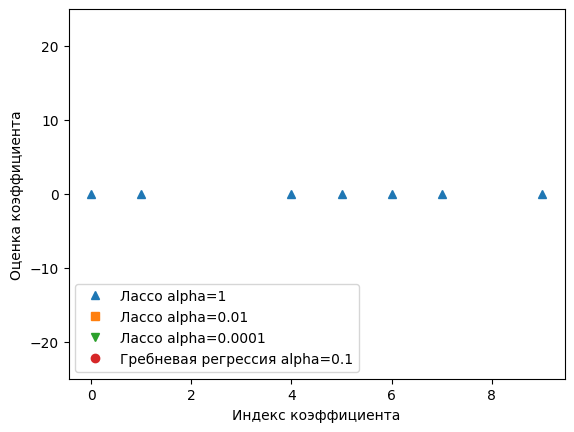

In [26]:
plt.plot(lasso.coef_, '^', label="Лассо alpha=1")
plt.plot(lasso001.coef_, 's', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.ylim(-25, 25)
plt.legend()

LogisticRegression

In [27]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.016
Правильность на тестовом наборе: 0.008


In [28]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.016
Правильность на тестовом наборе: 0.008


In [29]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.016
Правильность на тестовом наборе: 0.008


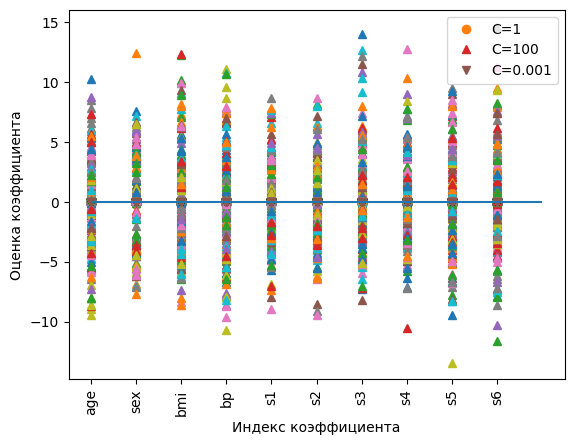

In [30]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.data.shape[1]), diabetes.feature_names, rotation = 90)
plt.hlines(0, 0, diabetes.data.shape[1])
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()
# Для того что бы убрать дубликаты
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())